In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [2]:
food = pd.read_csv('./Data/seogyodong+korean.csv')
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수,한식음식점여부
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,1,14,14,1
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,0,19,1,0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,0,22,3,0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,5,36,3,0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,0,30,6,0


In [12]:
# 20대 매출 비율이 70% 이상일 시에 비교 해보기
food['20대비율']=[2 if i >= 60 else 
               1 if i >= 40 else 0
               for i in food['연령대_20_매출_비율']]

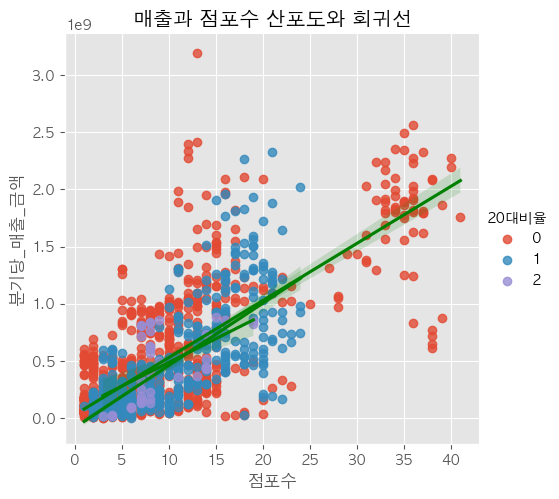

In [30]:
plt.style.use('ggplot')

sns.lmplot(
    x='점포수',
    y='분기당_매출_금액',
    line_kws={'color':'green'},
    data=food,
    hue='20대비율',
    # fit_reg=False
)


plt.title('매출과 점포수 산포도와 회귀선')

plt.show()

### 20대 매출 비율이 많으면 많을 수록 매출은 떨어진다. 이 비율을 잘 나타내는 것 별로 3가지로 비율을 구분했다. 

In [24]:
# 20대 매출 비율이 70% 이상일 시에 비교 해보기
food['아침매출비율']=[1 if i >= 10 else 0
               for i in food['시간대_06~11_매출_비율']]

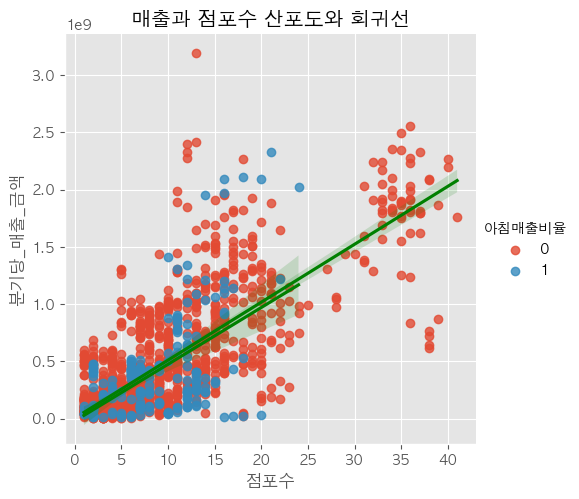

In [29]:
plt.style.use('ggplot')

sns.lmplot(
    x='점포수',
    y='분기당_매출_금액',
    line_kws={'color':'green'},
    data=food,
    hue='아침매출비율',
    fit_reg=True
)


plt.title('매출과 점포수 산포도와 회귀선')

plt.show()

### 6 - 11시 사이의 매출 비율이 10% 이상인 매장 보다는 매출 비율이 낮은 매장에서 높은 매출 금액을 보여준다. 그러므로 feature로서 적당하다.

### 여태까지 넣은 feature를 가지고 기본 예측률을 확인해보자

In [26]:
feature = food[['점포수','한식음식점여부','20대비율','아침매출비율']].to_numpy()
target = food['분기당_매출_금액'].to_numpy()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature)

In [28]:
from module.default import basic

basic(feature_scaled,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.6766417438480719
test :  0.5926185968260211
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.6201196085043807
test :  0.6160698613002042
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.6201192496768648
test :  0.6160734919841943
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.6201196085043807
test :  0.6160698613208688
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.7267149180141772
test :  0.5980926979413516
--------------------------------------------------


### 결론 : 하지만 우리는 요식업 창업을 목표로 하는 사람들로 하고 있기 때문에, 매출 비율 데이터를 미리 예상해서 사용자가 입력하기에는 어려움이 있다고 생각했다. 그래서 원래 데이터에 있었던 일별 시간별 연령대별 매출 건수 , 비율 , 매출액 관련 컬럼들은 삭제하고 진행하려고 한다. 

### 추후에 창업을 하고 매출을 올리기 위해 고민하는 사람들을 위한 앱이나 컨텐츠를 만들게 되면 이부분은 굉장히 유용하게 사용될 수 있을 것 같다. 